<a href="https://colab.research.google.com/github/vrindaaguptaa/firstproject/blob/main/wordcloud2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
!pip install wordcloud matplotlib numpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
nltk.download('averaged_perceptron_tagger') # Download the required resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
full_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hp_script.csv", nrows=5000, encoding='latin-1')
df = full_df[["dialogue"]]
df["dialogue"] = df["dialogue"].astype(str)

In [ ]:
df["dialogue_lower"] = df["dialogue"].str.lower()

In [ ]:
df.drop(["dialogue_lower"], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["dialogue_wo_punct"] = df["dialogue"].apply(lambda text: remove_punctuation(text))

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["dialogue_wo_stop"] = df["dialogue_wo_punct"].apply(lambda text: remove_stopwords(text))

In [ ]:
from collections import Counter
cnt = Counter()
for text in df["dialogue_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('I', 202),
 ('Harry', 85),
 ('Its', 47),
 ('You', 47),
 ('know', 46),
 ('Oh', 42),
 ('see', 41),
 ('Im', 39),
 ('Potter', 39),
 ('one', 38)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["dialogue_wo_stopfreq"] = df["dialogue_wo_stop"].apply(lambda text: remove_freqwords(text))

In [ ]:
df.drop(["dialogue_wo_punct", "dialogue_wo_stop"], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["dialogue_wo_stopfreqrare"] = df["dialogue_wo_stopfreq"].apply(lambda text: remove_rarewords(text))

In [ ]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns
df.drop(["dialogue_wo_stopfreq", "dialogue_wo_stopfreqrare"], axis=1, inplace=True)

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["dialogue_stemmed"] = df["dialogue"].apply(lambda text: stem_words(text))

In [ ]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["dialogue_lemmatized"] = df["dialogue"].apply(lambda text: lemmatize_words(text))

In [ ]:
lemmatizer.lemmatize("running")

'running'

In [ ]:
print("Word is : stripes")
print("Lemma result for verb : ",lemmatizer.lemmatize("stripes", 'v'))
print("Lemma result for noun : ",lemmatizer.lemmatize("stripes", 'n'))

Word is : stripes
Lemma result for verb :  strip
Lemma result for noun :  stripe


In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["dialogue_lemmatized"] = df["dialogue"].apply(lambda text: lemmatize_words(text))

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")


'game is on '

In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [ ]:
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    return text

In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.2 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)


In [ ]:
text = " ".join(df["dialogue_lemmatized"].astype(str).tolist())

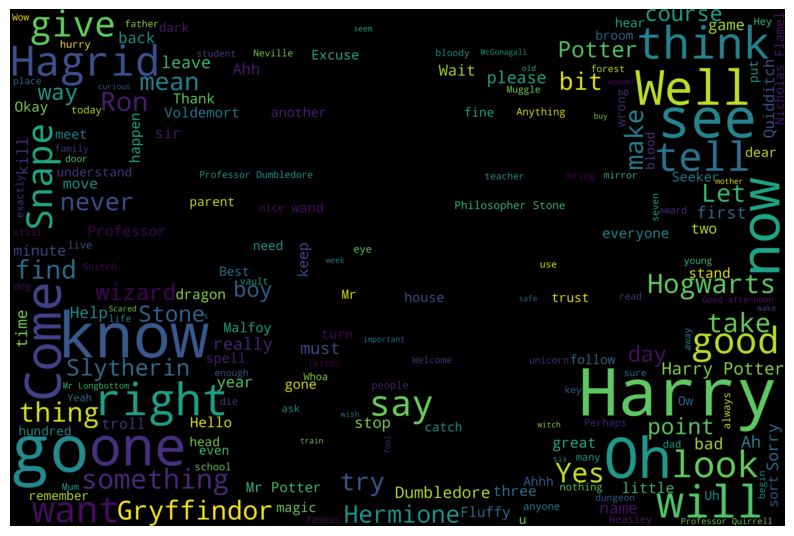

In [ ]:
flower_image = Image.open("/content/drive/MyDrive/Colab Notebooks/tim-mossholder-j3WIygrch5s-unsplash.jpg").convert('L')
# Plot the word cloud
flower_mask = np.array(flower_image)
flower_mask = np.where(flower_mask > 128, 255, 0)  # Convert to binary mask
wordcloud = WordCloud(mask=flower_mask, contour_color='black', contour_width=1, background_color='black').generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

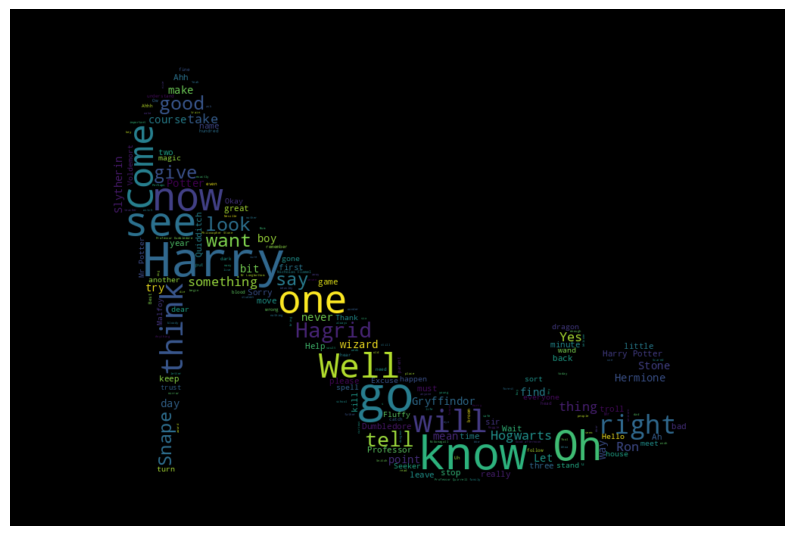

In [ ]:
flower_image = Image.open("/content/drive/MyDrive/Colab Notebooks/heel.jpg").convert('L')
# Plot the word cloud
flower_mask = np.array(flower_image)
flower_mask = np.where(flower_mask > 128, 255, 0)  # Convert to binary mask
wordcloud = WordCloud(mask=flower_mask, contour_color='black', contour_width=1, background_color='black').generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()